# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Loading the zoo dataset

In [2]:
zoo = pd.read_csv(r"C:\Users\Binita Mandal\Desktop\finity\KNN ASSIGNMENT\zoo.csv")

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# Assess Data Quality & Missing Values 

In [6]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
# Check if class_type has correct values
print(zoo.type.unique())

[1 4 2 7 6 5 3]


In [9]:
print(zoo.legs.unique())

[4 0 2 6 8 5]


In [10]:
# just making sure which animal has 5 legs
zoo.loc[zoo['legs'] == 5]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


# Exploratory Data Analysis 

(array([41., 20.,  5., 13.,  4.,  8., 10.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

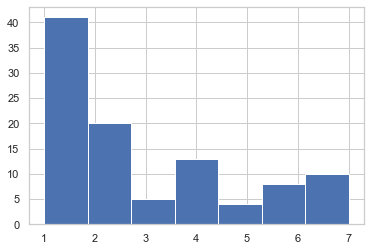

In [11]:
plt.hist(zoo.type, bins=7)

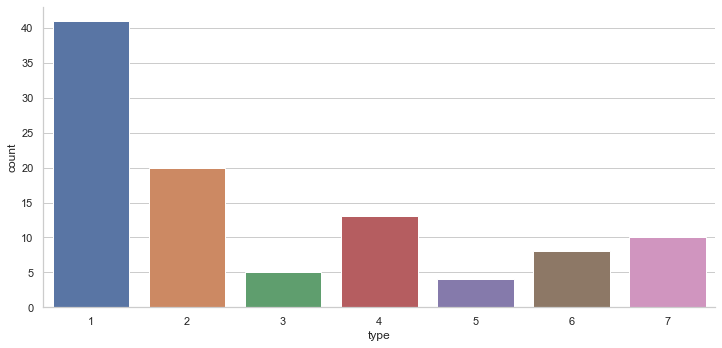

In [13]:
# See which class the most zoo animals belong to
sns.factorplot('type', data=zoo,kind="count", aspect=2)

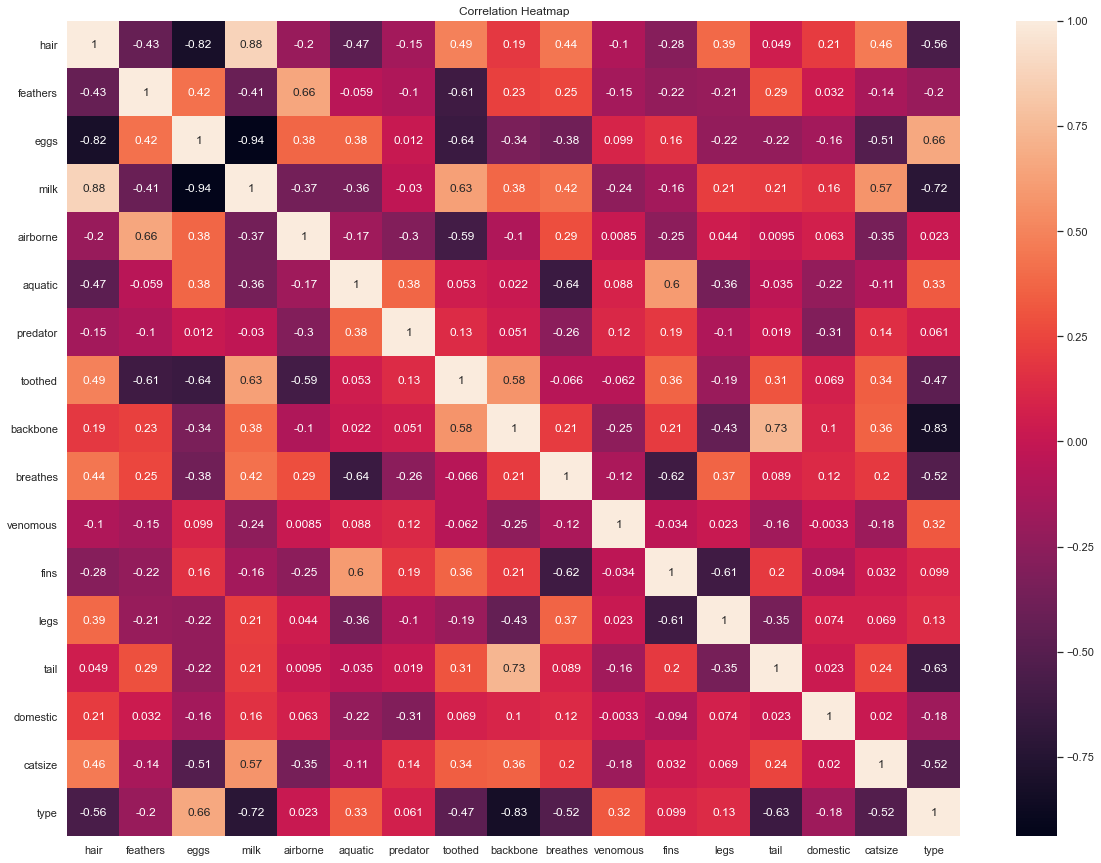

In [14]:
# heatmap to show correlations
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = zoo.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [15]:
# show vairable correlation which is more than 0.7 (positive or negative)
corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,hair,eggs,milk,backbone,tail,type
hair,NaN,-0.817382,0.878503,NaN,NaN,NaN
eggs,-0.817382,NaN,-0.938848,NaN,NaN,NaN
milk,0.878503,-0.938848,NaN,NaN,NaN,-0.723683
backbone,NaN,NaN,NaN,NaN,0.731762,-0.828845
tail,NaN,NaN,NaN,0.731762,NaN,NaN
type,NaN,NaN,-0.723683,-0.828845,NaN,NaN


In [16]:
zoo.groupby('type').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
type,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000


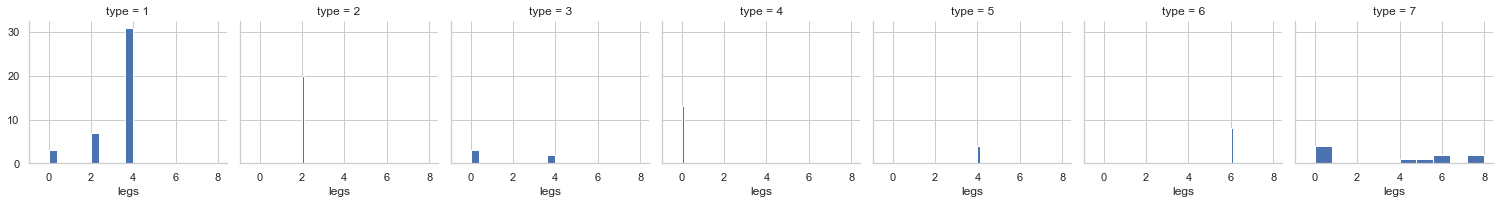

In [17]:
# checking leg number in each class
g = sns.FacetGrid(zoo, col="type")
g.map(plt.hist, "legs")
plt.show()

# Classification & Cross Validation 
# Split train and test dataset

In [18]:
from sklearn.model_selection import train_test_split
# 80/20 split
#animal=zoo.drop(['eggs', 'hair'], axis=1)
#X = zoo.iloc[:,1:15]
#y = zoo.iloc[:,15]
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Perceptron Method 

In [23]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
# make prediction
y_pred = ppn.predict(X_test)
# check model accuracy
accuracy_score(y_pred,y_test)

0.9032258064516129

In [24]:
# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.9032258064516129

In [25]:
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn

C:\Users\Binita Mandal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.95238095, 0.95      , 0.95      , 0.95      , 0.95      ])

In [26]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_ppn.mean(), score_ppn.std() * 2))

Accuracy: 0.95 (+/- 0.00)


#  Decision Tree

In [28]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
score_dt=cross_val_score(dt, X,y, cv=5)
score_dt

C:\Users\Binita Mandal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([1.  , 0.85, 0.95, 0.9 , 1.  ])

In [29]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_dt.mean(), score_dt.std() * 2))

Accuracy: 0.94 (+/- 0.12)


# SVM

In [30]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
score_svc=cross_val_score(svc, X,y, cv=5)
score_svc

C:\Users\Binita Mandal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([1.  , 0.95, 0.95, 0.95, 0.95])

In [31]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_svc.mean(), score_svc.std() * 2))

Accuracy: 0.96 (+/- 0.04)


# Multiclass Logistic Regression

In [32]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
score_lr=cross_val_score(lr, X,y, cv=5)
score_lr

C:\Users\Binita Mandal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([1.  , 0.95, 0.9 , 0.95, 0.95])

In [33]:
# The mean score and the 95% confidence interval of the score estimate are:
print("Accuracy: %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))

Accuracy: 0.95 (+/- 0.06)


In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Perceptron', 'Decision Tree'],
    'Score': [score_svc.mean(), score_lr.mean(), score_ppn.mean(), score_dt.mean()]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.960000
2,Perceptron,0.950476
1,Logistic Regression,0.950000
3,Decision Tree,0.940000
